In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ti_data=pd.read_csv("titanic.csv")
ti_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ti_data.shape

(891, 12)

In [4]:
ti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


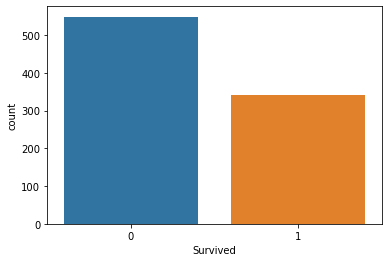

In [5]:
sns.countplot(x="Survived",data=ti_data)

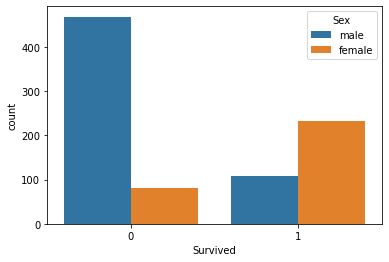

In [6]:
sns.countplot(x="Survived",hue="Sex",data=ti_data)

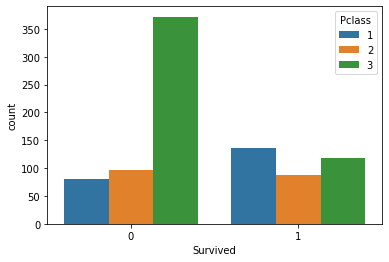

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=ti_data)

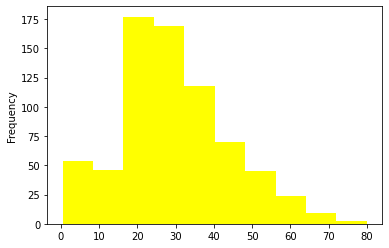

In [8]:
ti_data['Age'].plot.hist(color="yellow")

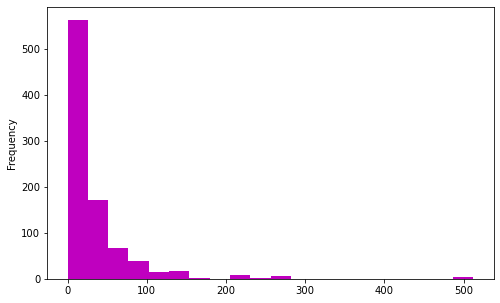

In [9]:
ti_data["Fare"].plot.hist(bins=20,figsize=(8,5),color='m')

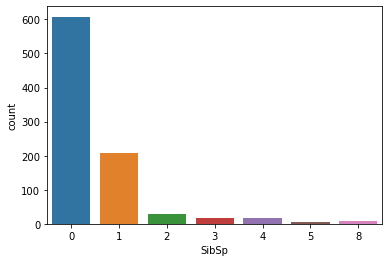

In [10]:
sns.countplot(x='SibSp',data=ti_data)

# Data_Preprocessing

In [11]:
ti_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

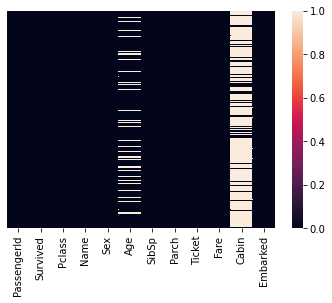

In [12]:
sns.heatmap(ti_data.isnull(),yticklabels=False)

In [13]:
ti_data.drop(['Cabin'],axis=1,inplace=True)

In [14]:
ti_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


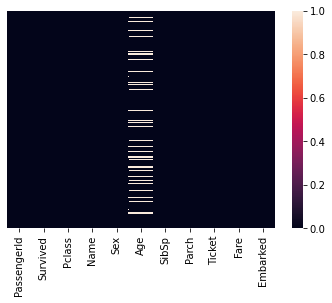

In [15]:
sns.heatmap(ti_data.isnull(),yticklabels=False)

In [16]:
ti_data['Age'].fillna(ti_data["Age"].mean(),inplace=True)

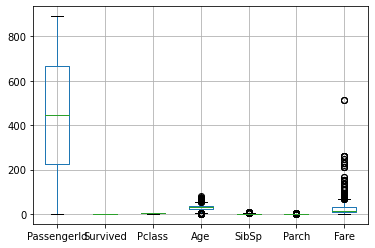

In [17]:
ti_data.boxplot()#for finding outliers

In [18]:
ti_data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

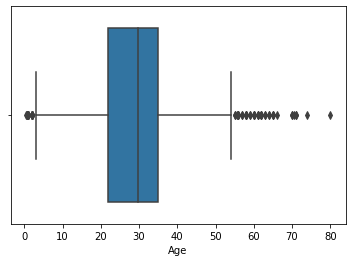

In [19]:
sns.boxplot(ti_data['Age'],data=ti_data)

In [20]:
IQR_AGE=ti_data['Age'].quantile(0.75)-ti_data['Age'].quantile(0.25)
IQR_AGE

13.0

In [21]:
upper_Limit=ti_data['Age'].quantile(0.75)+1.5*IQR_AGE
upper_Limit

54.5

In [22]:
outLier_indices=ti_data[ti_data['Age'] > upper_Limit]
outLier_indices

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,C


In [23]:
for i in outLier_indices.index:
    ti_data['Age'][i]=ti_data['Age'].quantile(0.95)

<ipython-input-23-d8a6e517dff4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ti_data['Age'][i]=ti_data['Age'].quantile(0.95)


In [24]:
lower_Limit=ti_data['Age'].quantile(0.25)-1.5*IQR_AGE
lower_Limit

2.5

In [25]:
outLier_indices_1=ti_data[ti_data['Age'] < lower_Limit]
outLier_indices_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S


In [26]:
for i in outLier_indices_1.index:
    ti_data['Age'][i]=ti_data['Age'].quantile(0.05)

<ipython-input-26-a3b39e3b82fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ti_data['Age'][i]=ti_data['Age'].quantile(0.05)


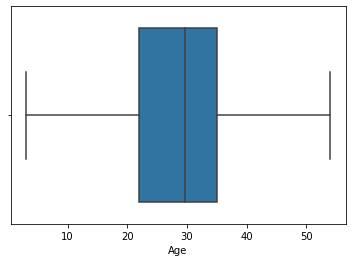

In [27]:
sns.boxplot(ti_data['Age'],data=ti_data)

In [28]:
ti_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [29]:
ti_data.dropna(inplace=True)

In [30]:
ti_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
sex=pd.get_dummies(ti_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
embark=pd.get_dummies(ti_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
pcl=pd.get_dummies(ti_data['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [34]:
ti_data.drop(["Sex","Embarked","PassengerId","Pclass","Ticket","Name","Fare"],axis=1,inplace=True)

In [35]:
ti_data.head()

,Survived,Age,SibSp,Parch
0,0,22.0,1,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


In [36]:
ti_data=pd.concat([ti_data,sex,embark,pcl],axis=1)
ti_data.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [37]:
X=ti_data.drop("Survived",axis=1)
y=ti_data["Survived"]

X.head()

,Age,SibSp,Parch,male,Q,S,2,3
0,22.0,1,0,1,0,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,0,1,0,1
3,35.0,1,0,0,0,1,0,0
4,35.0,0,0,1,0,1,0,1


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [41]:
X_train

,Age,SibSp,Parch,male,Q,S,2,3
777,5.000000,0,0,0,0,1,0,1
782,29.000000,0,0,1,0,1,0,0
708,22.000000,0,0,0,0,1,0,0
153,40.500000,0,2,1,0,1,0,1
563,29.699118,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
857,51.000000,0,0,1,0,1,0,0
873,47.000000,0,0,1,0,1,0,1
837,29.699118,0,0,1,0,1,0,1
793,29.699118,0,0,1,0,0,0,0


In [42]:
y_train

777    1
782    0
708    1
153    0
563    0
      ..
857    1
873    0
837    0
793    0
521    0
Name: Survived, Length: 711, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score ,classification_report

In [44]:
from sklearn.linear_model import LogisticRegression

L_reg=LogisticRegression()
L_reg.fit(X_train,y_train)

y_pred=L_reg.predict(X_test)

accuracy_score(y_test,y_pred)*100

79.7752808988764

In [45]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       114\n           1       0.73      0.69      0.71        64\n\n    accuracy                           0.80       178\n   macro avg       0.78      0.77      0.78       178\nweighted avg       0.80      0.80      0.80       178\n'

In [46]:
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier()

DTC.fit(X_train,y_train)

y_pred1=DTC.predict(X_test)

accuracy_score(y_test,y_pred1)*100

80.33707865168539

In [47]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.84       114\n           1       0.72      0.75      0.73        64\n\n    accuracy                           0.80       178\n   macro avg       0.79      0.79      0.79       178\nweighted avg       0.81      0.80      0.80       178\n'

In [48]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=100)

RFC.fit(X_train,y_train)

y_pred2=RFC.predict(X_test)

accuracy_score(y_test,y_pred2)*100

78.65168539325843

In [49]:
ti_data.describe()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.410286,0.524184,0.382452,0.649044,0.086614,0.724409,0.206974,0.552306
std,0.486260,11.795024,1.103705,0.806761,0.477538,0.281427,0.447063,0.405365,0.497536
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,54.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
y_pred3=KNN_model.predict(X_test)

accuracy_score(y_test,y_pred3)*100

83.70786516853933

In [51]:
import pickle

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
pickle.dump(KNN_model,open('Titanic_inmovidu_model.pickle','wb'))

ml_model_pl=pickle.load(open('Titanic_inmovidu_model.pickle','rb'))

y_pred_pl=ml_model_pl.predict(X_test)


cm_pl=confusion_matrix(y_test,y_pred_pl)

print(cm_pl)

[[103  11]
 [ 18  46]]
